In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from keras.optimizers import Adam

time_step = 10
n_features = 1

In [142]:
df = pd.read_csv('./data/indexData.csv')

df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [143]:
df.tail()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0
112456,N100,2021-06-02,1258.489990,1263.709961,1258.239990,1263.619995,1263.619995,148465000.0


In [144]:
df.shape

(112457, 8)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [165]:
# drop the data which has null
df = df.dropna()
df.info()

df['Date'] = pd.to_datetime(df['Date'])
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110253 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      110253 non-null  object        
 1   Date       110253 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.6+ MB


,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


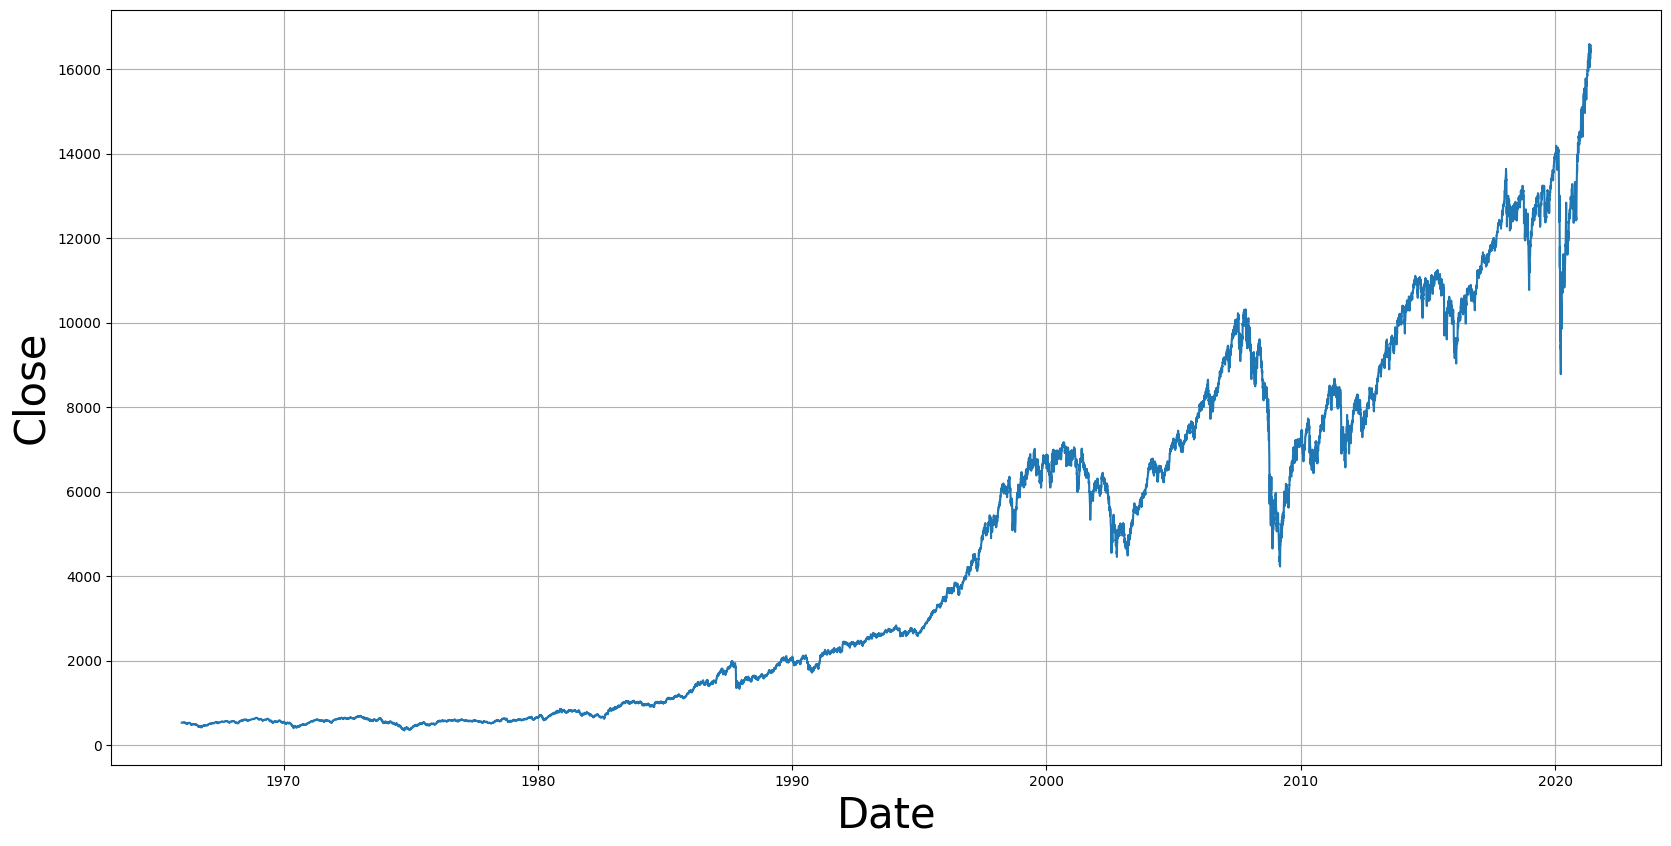

In [168]:
df_nya = df[df['Index']=='NYA']

plt.figure(figsize=(20, 10), dpi=100)
plt.plot(df_nya['Date'], df_nya['Close'])
plt.grid()
plt.xlabel('Date', fontsize=30)
plt.ylabel('Close', fontsize=30)
plt.show()

In [167]:
# Collect the stock Data(date and close)
df_nya_date_close = df_nya.loc[:, ['Date', 'Close']]
df_nya_date_close

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
13943,2021-05-24,16464.689450
13944,2021-05-25,16390.189450
13945,2021-05-26,16451.960940
13946,2021-05-27,16531.949220


In [149]:
df_nya_date = df_nya.loc[:, 'Date']
df_nya_close = df_nya.loc[:, 'Close']

print(df_nya_date)
print()
print(df_nya_close)

0       1965-12-31
1       1966-01-03
2       1966-01-04
3       1966-01-05
4       1966-01-06
           ...    
13943   2021-05-24
13944   2021-05-25
13945   2021-05-26
13946   2021-05-27
13947   2021-05-28
Name: Date, Length: 13947, dtype: datetime64[ns]

0          528.690002
1          527.210022
2          527.840027
3          531.119995
4          532.070007
             ...     
13943    16464.689450
13944    16390.189450
13945    16451.960940
13946    16531.949220
13947    16555.660160
Name: Close, Length: 13947, dtype: float64


0        0.031867
1        0.031778
2        0.031816
3        0.032014
4        0.032071
           ...   
13943    0.992421
13944    0.987930
13945    0.991654
13946    0.996475
13947    0.997904
Name: Close, Length: 13947, dtype: float64


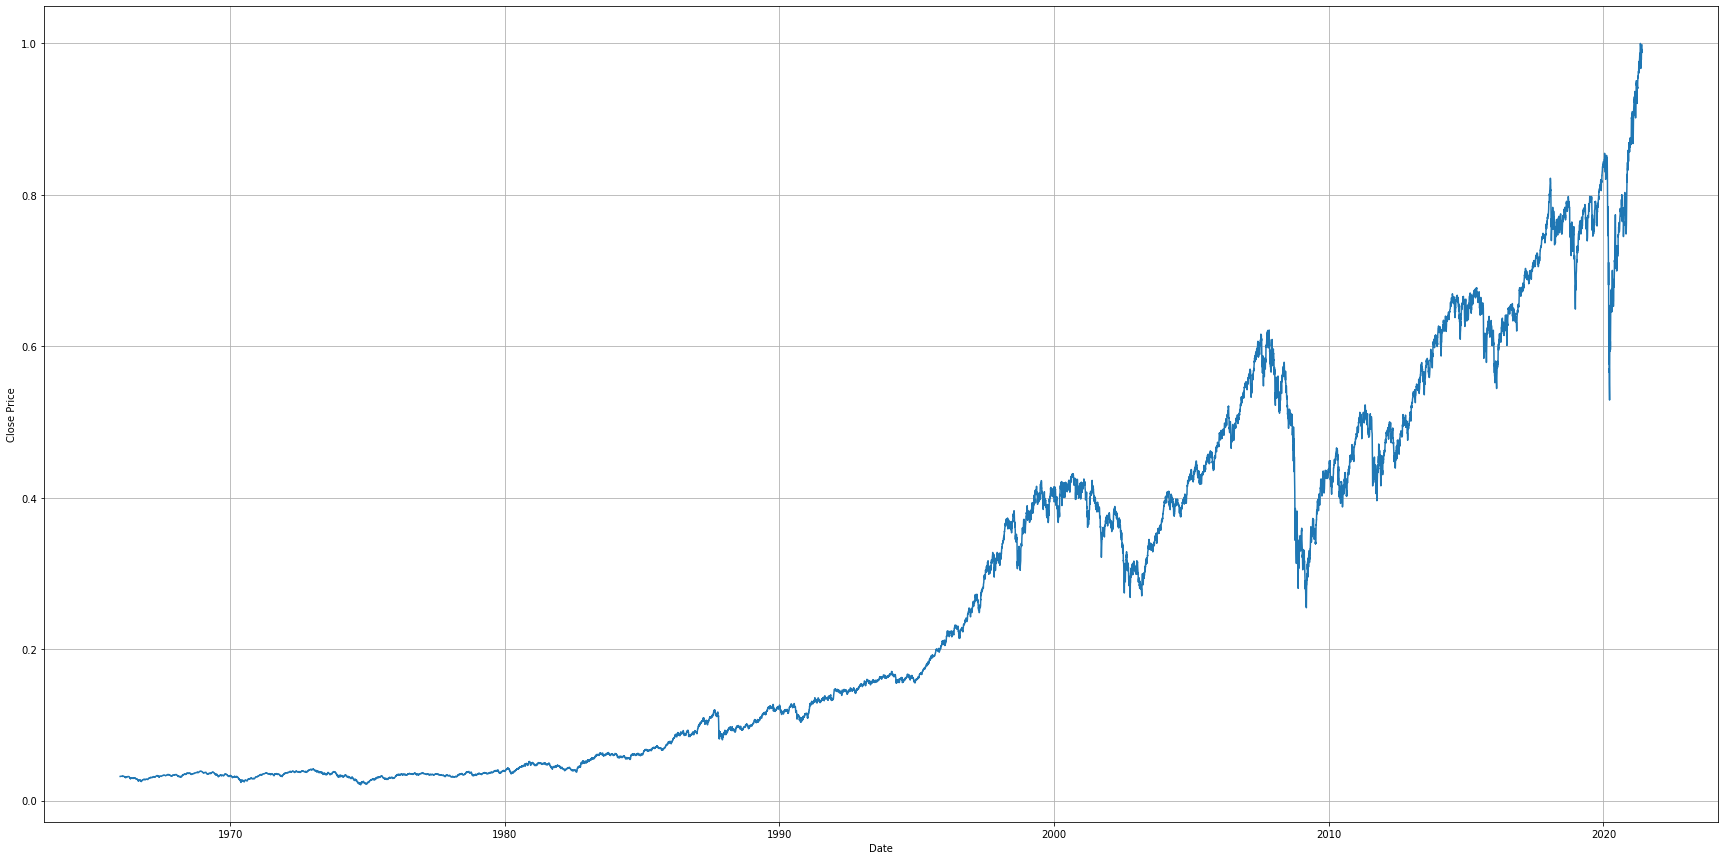

In [150]:
# standlize
df_nya_close = df_nya_close/max(df_nya_close)
print(df_nya_close)

plt.figure(figsize=(30, 15))
plt.plot(df_nya_date, df_nya_close)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

In [151]:
# split data to training set and testing set

data_train = df_nya_date_close[df_nya_date_close.Date < '2010-01-01']
data_test = df_nya_date_close[df_nya_date_close.Date >= '2010-01-01']

print(data_train.shape)
print('------------------')
print(data_test.shape)

(11076, 2)
------------------
(2871, 2)


In [152]:
# split data into samples
# def split(sequence, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         # check if we are beyond the sequence
#         if out_end_ix > len(sequence):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)

In [153]:
# define method to extract x and y
# for example assume we have 10 samples: 0, 1, 2, 3, ... ,9, and time_step is 8
# we will get [0, 1, ... ,7]; [1, 2, ... , 8]; [2, 3, ... , 9] three samples 
def extract_data(data, time_step):
    x = []
    y = []
    
    for i in range(len(data)-time_step):
        if (i+time_step) > len(data):
            break
        x.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step:i+time_step+1])
    
    x = np.array(x)
    x = x.reshape(x.shape[0], x.shape[1], n_features)
    y = np.array(y)
    
    return x, y
    

In [154]:
X, y = extract_data(data_train['Close'], 10)
print(x.shape)
print(y.shape)

(11066, 10, 1)
(11066, 1)


In [171]:
# create RNN model
model = Sequential()

# add RNN layer
model.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation='relu'))

# add output layer
model.add(Dense(units=1, activation='linear'))

# configure the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary

#train the model
RNN_model_history = model.fit(X,y,batch_size=30,epochs=200)

Epoch 1/200
369/369 [==============================] - 3s 4ms/step - loss: 2467435.5000
Epoch 2/200
369/369 [==============================] - 1s 4ms/step - loss: 3232.9966
Epoch 3/200
369/369 [==============================] - 1s 4ms/step - loss: 2548.0649
Epoch 4/200
369/369 [==============================] - 2s 4ms/step - loss: 2492.2031
Epoch 5/200
369/369 [==============================] - 2s 5ms/step - loss: 2418.2542
Epoch 6/200
369/369 [==============================] - 2s 4ms/step - loss: 2409.5244
Epoch 7/200
369/369 [==============================] - 2s 4ms/step - loss: 2406.1482
Epoch 8/200
369/369 [==============================] - 2s 4ms/step - loss: 2355.9077
Epoch 9/200
369/369 [==============================] - 1s 4ms/step - loss: 2366.5378
Epoch 10/200
369/369 [==============================] - 1s 4ms/step - loss: 2291.6072
Epoch 11/200
369/369 [==============================] - 1s 3ms/step - loss: 2312.4031
Epoch 12/200
369/369 [==============================] - 1s 3

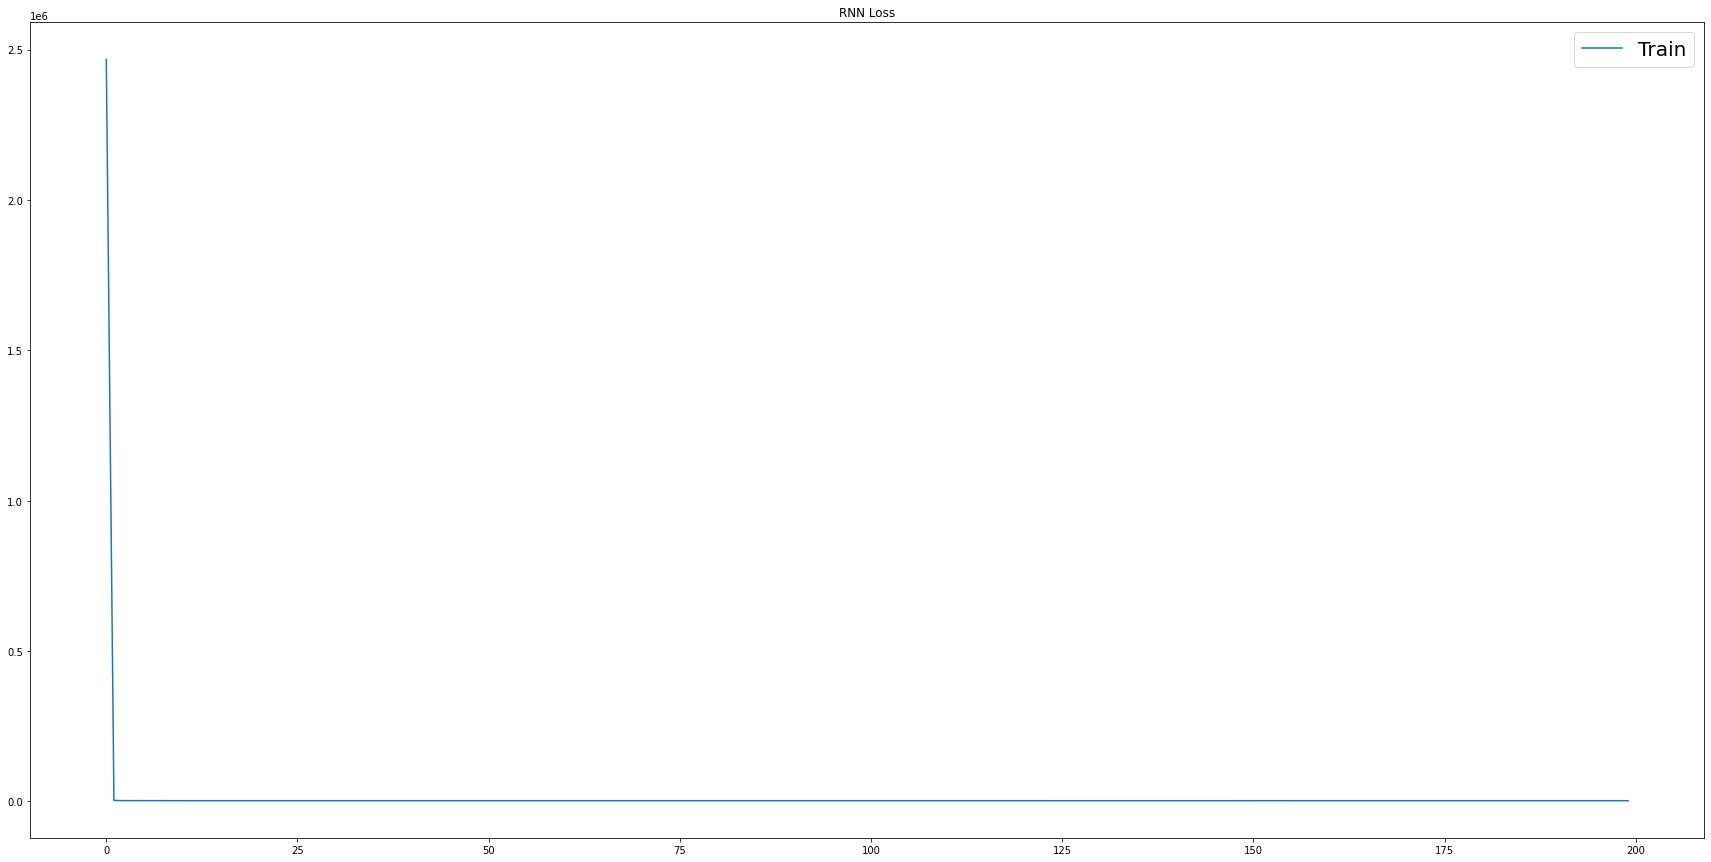

In [174]:
# draw Loss
plt.figure(figsize=(30, 15))
plt.plot(RNN_model_history.history['loss'], label='Train')
plt.title('RNN Loss')
plt.legend(fontsize=20)
plt.show()

In [175]:
# make prediction on test data
X_test, y_test = extract_data(data_test['Close'], time_step)
print(X_test.shape)
print(y_test.shape)

(2861, 10, 1)
(2861, 1)


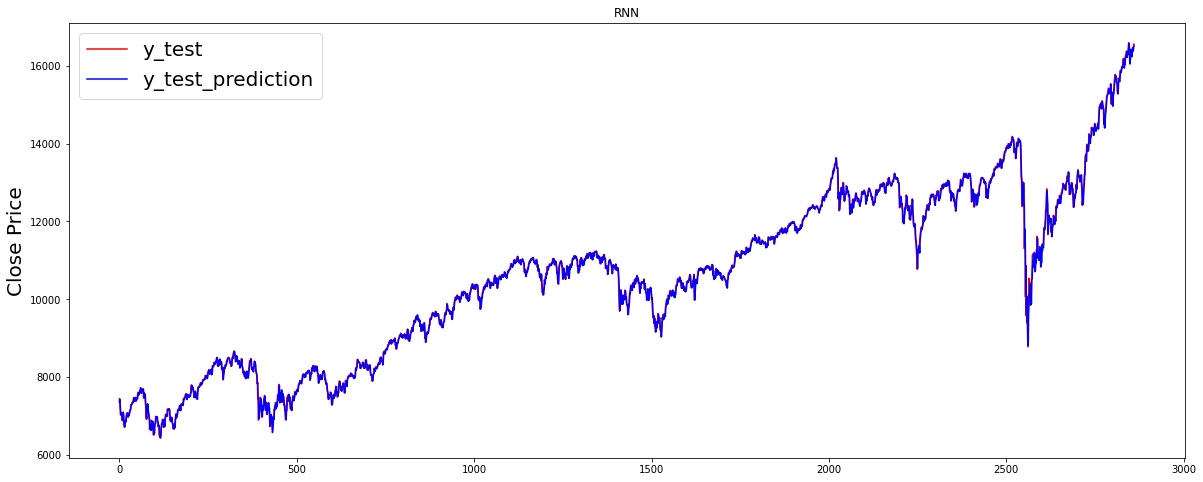

In [181]:
y_test_predict = model.predict(X_test) * max(df_nya_close)
y_test = y_test * max(df_nya_close)

plt.figure(figsize=(20, 8))
plt.plot(y_test, color='r', label='y_test')
plt.plot(y_test_predict, color='b', label='y_test_prediction')
plt.title('RNN')
plt.ylabel('Close Price', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [155]:
# create LSTM model
model = Sequential()

# add RNN layer
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(time_step, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))

# add output layer
model.add(Dense(units=1))

# configure the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 10, 200)           161600    
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 200)           320800    
_________________________________________________________________
lstm_17 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [156]:
# train the model
model_history = model.fit(X, y, epochs=100, verbose=2, validation_split=0.33)

Epoch 1/100
232/232 - 10s - loss: 313159.7500 - accuracy: 0.0000e+00 - val_loss: 73584.8516 - val_accuracy: 0.0000e+00
Epoch 2/100
232/232 - 7s - loss: 3084.3081 - accuracy: 0.0000e+00 - val_loss: 39231.2109 - val_accuracy: 0.0000e+00
Epoch 3/100
232/232 - 6s - loss: 562.3922 - accuracy: 0.0000e+00 - val_loss: 26891.4277 - val_accuracy: 0.0000e+00
Epoch 4/100
232/232 - 7s - loss: 710.8142 - accuracy: 0.0000e+00 - val_loss: 36875.7578 - val_accuracy: 0.0000e+00
Epoch 5/100
232/232 - 7s - loss: 5653.9277 - accuracy: 0.0000e+00 - val_loss: 43820.6523 - val_accuracy: 0.0000e+00
Epoch 6/100
232/232 - 7s - loss: 1249.2225 - accuracy: 0.0000e+00 - val_loss: 57967.2500 - val_accuracy: 0.0000e+00
Epoch 7/100
232/232 - 8s - loss: 1005.2404 - accuracy: 0.0000e+00 - val_loss: 24454.9121 - val_accuracy: 0.0000e+00
Epoch 8/100
232/232 - 8s - loss: 544.2468 - accuracy: 0.0000e+00 - val_loss: 40253.5156 - val_accuracy: 0.0000e+00
Epoch 9/100
232/232 - 8s - loss: 487.7266 - accuracy: 0.0000e+00 - val_l

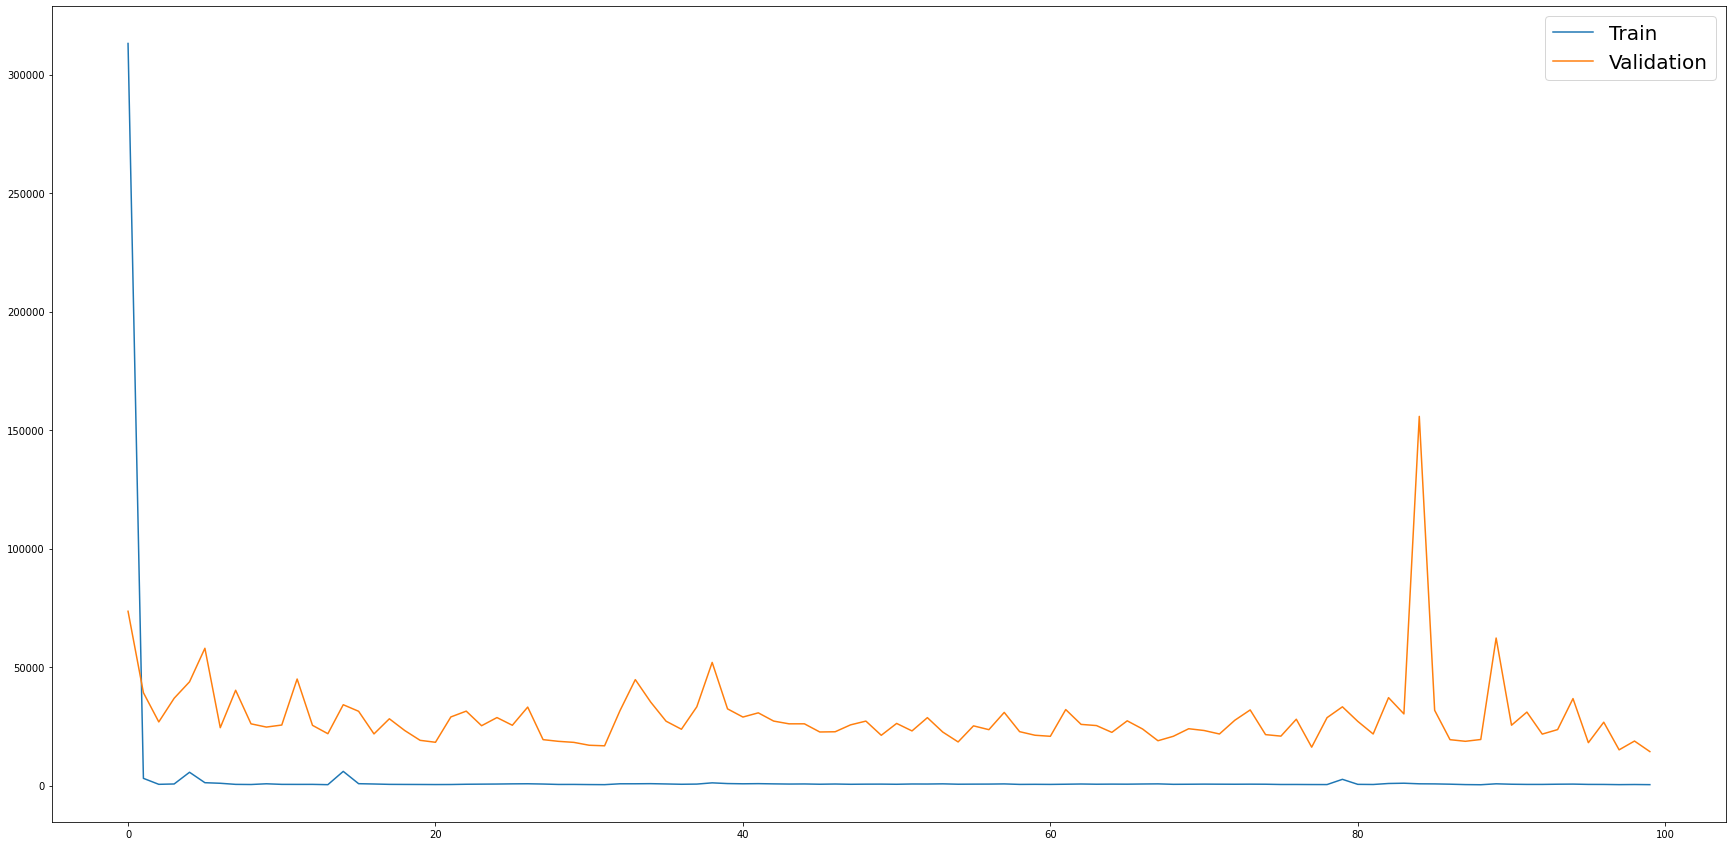

In [157]:
# draw the loss
plt.figure(figsize=(30, 15))
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Validation')
plt.legend(fontsize=20)
plt.show()

In [158]:
# make prediction based on the training data
y_train_predict = model.predict(x) * max(df_nya_close)
y_train = y * max(df_nya_close)
print(y_train_predict.shape)
print('-------------------')
print(y_train.shape)

(11066, 1)
-------------------
(11066, 1)


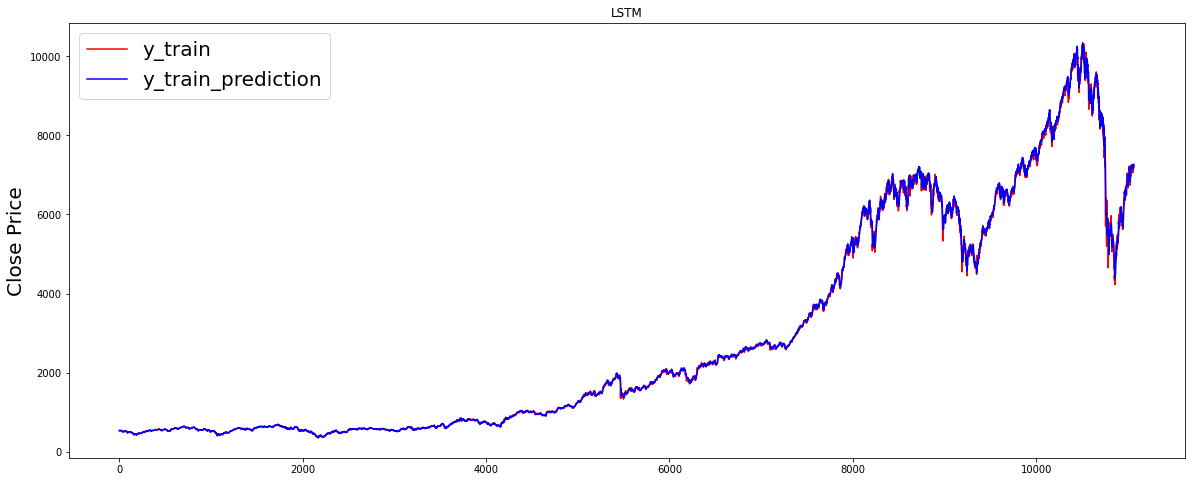

In [182]:
plt.figure(figsize=(20, 8))
plt.plot(y_train, color='r', label='y_train')
plt.plot(y_train_predict, color='b', label='y_train_prediction')
plt.title('LSTM')
plt.ylabel('Close Price', fontsize=20)
plt.legend(fontsize=20)
plt.show()


In [160]:
# make prediction on test data
X_test, y_test = extract_data(data_test['Close'], time_step)
print(X_test.shape)
print(y_test.shape)

(2861, 10, 1)
(2861, 1)


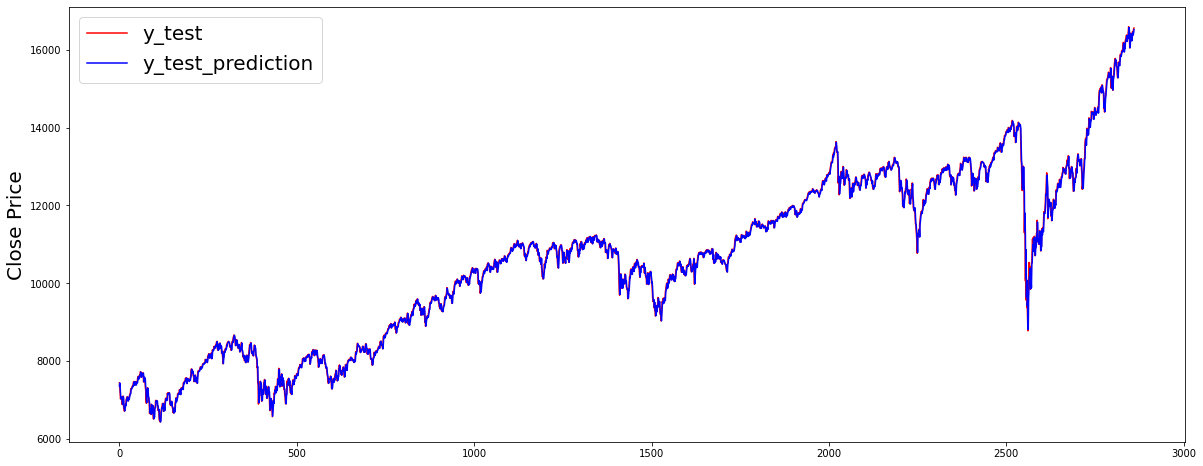

In [179]:
y_test_predict = model.predict(X_test) * max(df_nya_close)
y_test = y_test * max(df_nya_close)

plt.figure(figsize=(20, 8))
plt.plot(y_test, color='r', label='y_test')
plt.plot(y_test_predict, color='b', label='y_test_prediction')
plt.ylabel('Close Price', fontsize=20)
plt.legend(fontsize=20)
plt.show()